<a href="https://colab.research.google.com/github/meredithoopis/DRL_HF_course/blob/main/Unit%201/Lunar_lander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stable-baselines3==2.0.0a5
!pip install swig
!pip install gymnasium[box2d]
!pip install huggingface_sb3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!apt install swig cmake

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,005 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
#Restart the runtime
import os
os.kill(os.getpid(), 9)

In [ ]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [773 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,898 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu j

In [ ]:
#Virtual display
from pyvirtualdisplay import Display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [ ]:
import gymnasium as gym
from huggingface_sb3 import load_from_hub, package_to_hub
from huggingface_hub import notebook_login
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor


In [ ]:
#creating the Lunar lander env
#Action space: 4 discrete actions: https://gymnasium.farama.org/environments/box2d/lunar_lander/ (For more info on rewards)
env = gym.make('LunarLander-v2')
obs, info = env.reset() #The initial state given by the environment
for _ in range(21):
    #Take a random action
    action = env.action_space.sample()
    print("Taking action: ", action)
    #Truncated:  this is a timelimit, if outside of scope for MDP
    obs, reward, terminated, truncated, info = env.step(action) #When taking this action, there will be the observation, reward, and corresponding info
    if terminated or truncated: #If hitting terminal point, or terminated because of exceeding time limit
        print("Reseting environment..")
        obs, info = env.reset()
env.close()

Taking action:  2
Taking action:  0
Taking action:  3
Taking action:  0
Taking action:  1
Taking action:  1
Taking action:  0
Taking action:  2
Taking action:  0
Taking action:  0
Taking action:  2
Taking action:  0
Taking action:  2
Taking action:  1
Taking action:  0
Taking action:  3
Taking action:  3
Taking action:  3
Taking action:  3
Taking action:  3
Taking action:  2


In [ ]:
env = gym.make('LunarLander-v2')
env.reset()
print("Observation space: ", env.observation_space.shape)
print("Sample observation: ", env.observation_space.sample())

Observation space:  (8,)
Sample observation:  [-8.520069   -6.1779947   0.2694899  -2.9374459   2.2115712  -2.2988918
  0.59163564  0.57948816]


The observation is a vector of size 8, where each value contains different information about the lander:

Horizontal pad coordinate (x)\
Vertical pad coordinate (y)\
Horizontal speed (x)\
Vertical speed (y)\
Angle\
Angular speed\
If the left leg contact point has touched the land (boolean)\
If the right leg contact point has touched the land (boolean)

In [ ]:
print("Action space: ", env.action_space.n)
print("Action space sample:", env.action_space.sample())

Action space:  4
Action space sample: 1


In [ ]:
#Creating a vectorized env:
env = make_vec_env('LunarLander-v2', n_envs=16)

In [ ]:
#Model: PPO: Combining: Policy-based + Value-based rl
#env = gym.make('LunarLander-v2')
#Time trained: More than 20 minutes

model_name = 'ppo-LunarLander-v2'
model = PPO('MlpPolicy', env = env,n_steps= 1024, batch_size=64, n_epochs=4, gamma=0.999, gae_lambda=0.98, ent_coef=0.01, verbose=1)
model.learn(total_timesteps=999999)
model.save(model_name)

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.6     |
|    ep_rew_mean     | -207     |
| time/              |          |
|    fps             | 2903     |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 16384    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 89.5        |
|    ep_rew_mean          | -137        |
| time/                   |             |
|    fps                  | 2198        |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.009482976 |
|    clip_fraction        | 0.0784      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.000689   |
|    learnin

In [ ]:
#Evaluate
eval_env = Monitor(gym.make('LunarLander-v2'))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f'mean reward: {mean_reward:.2f} +/- {std_reward}' )

mean reward: 248.34 +/- 11.985825074440555


In [ ]:
notebook_login()
!git config --global credential.helper store

In [ ]:
#Public the model to hf modelhub
from stable_baselines3.common.vec_env import DummyVecEnv
repo_id = 'lisagrace/LunarLander-v2'
model_arc = "PPO"
env_id = 'LunarLander-v2'
commit_message = 'Uploading model'
eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode = 'rgb_array')])
package_to_hub(model=model,
               model_name=model_name, model_architecture=model_arc, env_id = env_id, eval_env = eval_env,
               repo_id = repo_id, commit_message=commit_message)


ℹ This function will save, evaluate, generate a video of your agent,
create a model card and push everything to the hub. It might take up to 1min.
This is a work in progress: if you encounter a bug, please open an issue.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Saving video to /tmp/tmp3ix4bhex/-step-0-to-step-1000.mp4
Moviepy - Building video /tmp/tmp3ix4bhex/-step-0-to-step-1000.mp4.
Moviepy - Writing video /tmp/tmp3ix4bhex/-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmp3ix4bhex/-step-0-to-step-1000.mp4
ℹ Pushing repo lisagrace/LunarLander-v2 to the Hugging Face Hub


policy.pth:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

policy.optimizer.pth:   0%|          | 0.00/88.4k [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

ppo-LunarLander-v2.zip:   0%|          | 0.00/148k [00:00<?, ?B/s]

pytorch_variables.pth:   0%|          | 0.00/864 [00:00<?, ?B/s]

ℹ Your model is pushed to the Hub. You can view your model here:
https://huggingface.co/lisagrace/LunarLander-v2/tree/main/


CommitInfo(commit_url='https://huggingface.co/lisagrace/LunarLander-v2/commit/3998e47b948e9d26e63f3ca3311cdf952886e5ee', commit_message='Uploading model', commit_description='', oid='3998e47b948e9d26e63f3ca3311cdf952886e5ee', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#Load model from hub
!pip install shimmy

In [ ]:
#load model and evaluate from my hub
filename = 'ppo-LunarLander-v2.zip'
custom = {
    'learning_rate': 0.1,
    'lr_schedule': lambda _: 0.1,
    'clip_range': lambda _: 0.1
}
checkpoint = load_from_hub(repo_id, filename)
Model = PPO.load(checkpoint, custom_objects=custom, print_system_info=True)


ppo-LunarLander-v2.zip:   0%|          | 0.00/148k [00:00<?, ?B/s]

== CURRENT SYSTEM INFO ==
- OS: Linux-6.1.58+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
- Python: 3.10.12
- Stable-Baselines3: 2.0.0a5
- PyTorch: 2.2.1+cu121
- GPU Enabled: True
- Numpy: 1.25.2
- Cloudpickle: 2.2.1
- Gymnasium: 0.28.1
- OpenAI Gym: 0.25.2

== SAVED MODEL SYSTEM INFO ==
- OS: Linux-6.1.58+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
- Python: 3.10.12
- Stable-Baselines3: 2.0.0a5
- PyTorch: 2.2.1+cu121
- GPU Enabled: True
- Numpy: 1.25.2
- Cloudpickle: 2.2.1
- Gymnasium: 0.28.1
- OpenAI Gym: 0.25.2



In [ ]:
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(Model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=253.34 +/- 23.231568980821628


##Check the model on my HuggingFace: [Lunar](https://huggingface.co/lisagrace/LunarLander-v2)
 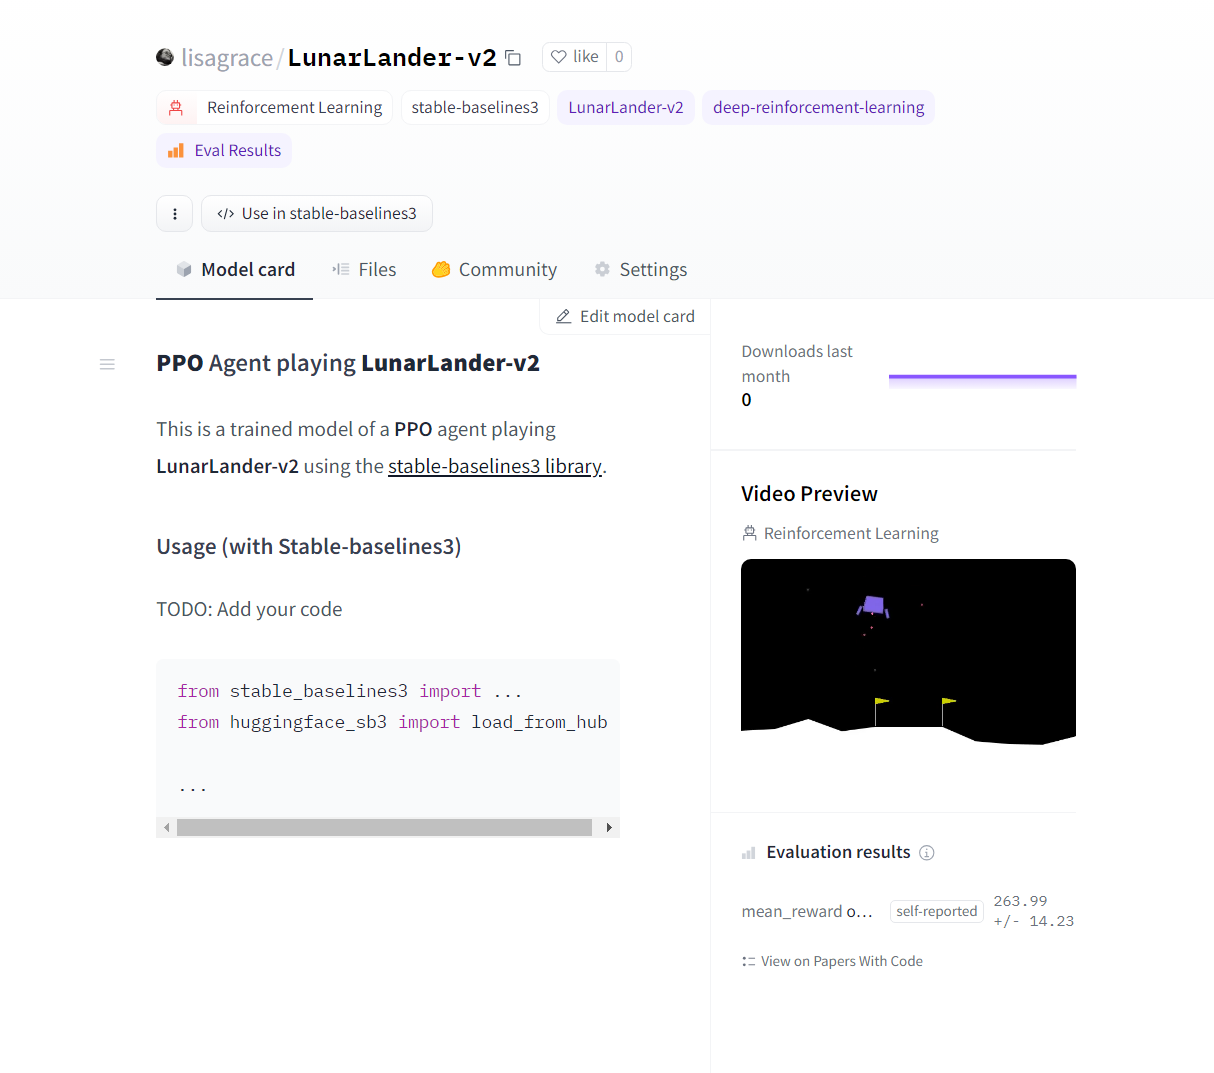